### Game of Pig

Rules:

1. Two players take turns rolling a single die as many times as they wish. Each roll adds a score equal to the number rolled to the player's total.
2. If a player rolls a 1, their score for that turn is zero, and their turn ends.
3. At any point during a player's turn, they can choose to stop rolling and keep their score. The first player to reach 100 wins.

That's it! Let's play.

There are two basic strategies for this game.  The first is known as roll-based strategy, where you roll a set number of times on each turn (unless you lose).  The second is known as score-based strategy, where you roll until you reach a certain score, and then stop.

We seek to develop an algorithm that combines these two strategies.  One such algorithm is as follows:

Roll until you reach N_stop points, unless you reach N_roll rolls first.

In [1]:
# The usual libraries
import random
import matplotlib.pyplot as plt
import numpy as np


# A couple of debug flags to control print statements
debug1 = False
debug2 = False

# Number of games to simulate for each configuration
nsims = 100

In [2]:
# function to play an entire game of pig
# N_roll is the number of rolls per turn
# N_stop is the score at which the player stops rolling
# end_score is the score at which the game ends
# returns the average roll per turn

debug1 = False
debug2 = False

def game_play3(N_roll, N_stop, end_score):

    # Initialize the score (for each of two players) and turn number within the game
    score = [0,0]
    turn = 0

    # Play the game - keep going until one player reaches the end score
    while score[0] < end_score and score[1] < end_score:

        # Initialize the score for this player during this turn and increment turn number
        turn_score = 0
        turn += 1

        if debug2:
            print("Turn", turn)
            for i in range(2):
                print("Player", i+1, "score:", score[i])
            print("Player", turn%2+1, "turn")

        roll = 0
        n_rolls = 0
        # Keep rolling until you (roll a 1) or (reach N_roll) or (reach N_stop) or (win the game)
        while roll != 1 and n_rolls < N_roll and turn_score < N_stop and score[turn%2] < end_score:

            roll = random.randint(1,6)
            n_rolls += 1

            if debug2:
                print("Roll:", roll)
                print("Number of rolls:", n_rolls)

            if roll == 1:
                if debug2:
                    print("Player", turn%2+1, "loses turn")
                # If you roll a 1, you lose all points for this turn and your turn is over
                score[turn%2] = score[turn%2] - turn_score
                break
            else:
                score[turn%2] += roll
                if debug2:
                    print("Player", turn%2+1, "score:", score[turn%2])
                #
                turn_score += roll

        if debug2:
            print("Player", turn%2+1, "turn over")
            print()

    if debug1:
        print(f"Final score: Player 1: {score[0]}, Player 2: {score[1]}")
        print(f"Player {np.argmax(score)+1} wins!")
        print(f"Game took {turn} turns")

    return 2.0*np.mean(score)/turn


In [3]:
import pandas as pd
# Choose end score
end_score3 = 500

# initialize an array to hold the four different arrays of average roll vs. N_stop for the four different end scores.  Each array will have 49 elements, one for each N_stop from 1 to 49
df = pd.DataFrame(columns=['N_stop', 'N_roll', 'Avg_roll'])

print(df)

for nstop in range(1,100):
    for nroll in range(1,50):
        sum_avg = 0
        for i in range(nsims):
            avg = game_play3(nroll, nstop, end_score3)
            sum_avg += avg
            #print(f"Average roll over all turns = {avg}")

        print(f"Average roll over all turns and sims for N_roll = {nroll} and N_stop = {nstop} is {sum_avg/nsims}")
        df.loc[len(df.index)] = [nstop, nroll, sum_avg/nsims]



Empty DataFrame
Columns: [N_stop, N_roll, Avg_roll]
Index: []
Average roll over all turns and sims for N_roll = 1 and N_stop = 1 is 3.323798481873001
Average roll over all turns and sims for N_roll = 2 and N_stop = 1 is 3.332553788606473
Average roll over all turns and sims for N_roll = 3 and N_stop = 1 is 3.324011745391104
Average roll over all turns and sims for N_roll = 4 and N_stop = 1 is 3.3219370572475793
Average roll over all turns and sims for N_roll = 5 and N_stop = 1 is 3.344902998931598
Average roll over all turns and sims for N_roll = 6 and N_stop = 1 is 3.3494924111508393
Average roll over all turns and sims for N_roll = 7 and N_stop = 1 is 3.32804506153799
Average roll over all turns and sims for N_roll = 8 and N_stop = 1 is 3.323605466904742
Average roll over all turns and sims for N_roll = 9 and N_stop = 1 is 3.3178528626088553
Average roll over all turns and sims for N_roll = 10 and N_stop = 1 is 3.333969198924838
Average roll over all turns and sims for N_roll = 11 an

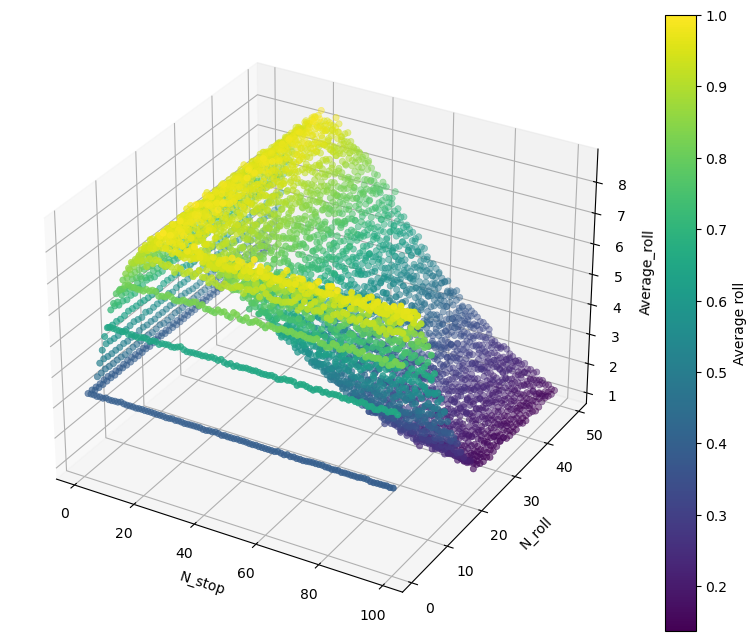

In [4]:
#print(df)

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
c = df['Avg_roll']/max(df['Avg_roll'])

ax.set_xlabel('N_stop')
ax.set_ylabel('N_roll')
ax.set_zlabel('Average_roll')

fig.colorbar(ax.scatter(df['N_stop'], df['N_roll'], df['Avg_roll'], c=c, cmap='viridis', linewidth=0.5), label='Average roll')

plt.show()


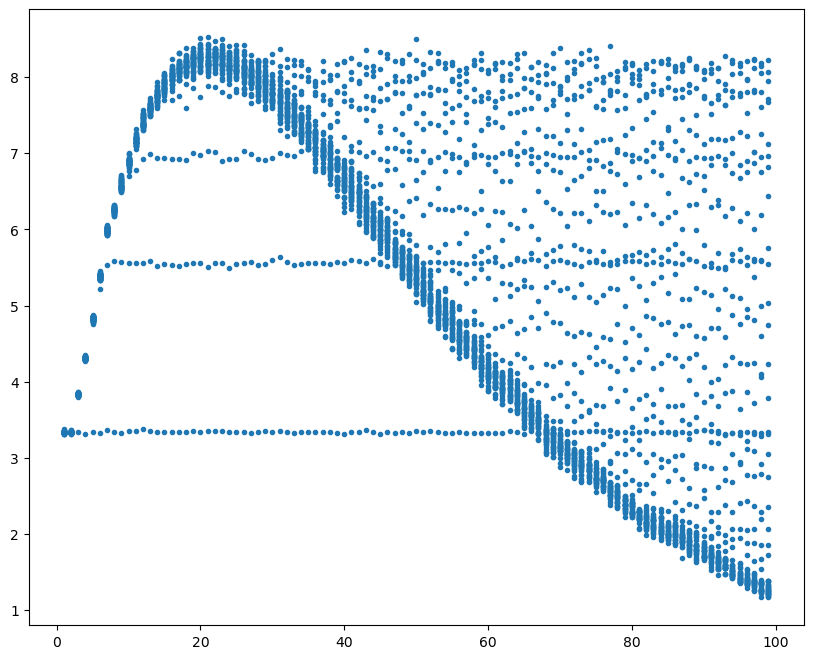

In [5]:
# plot the average roll vs. N_stop for the entire simulation
plt.figure(figsize=(10, 8))
plt.plot(df['N_stop'], df['Avg_roll'], '.')

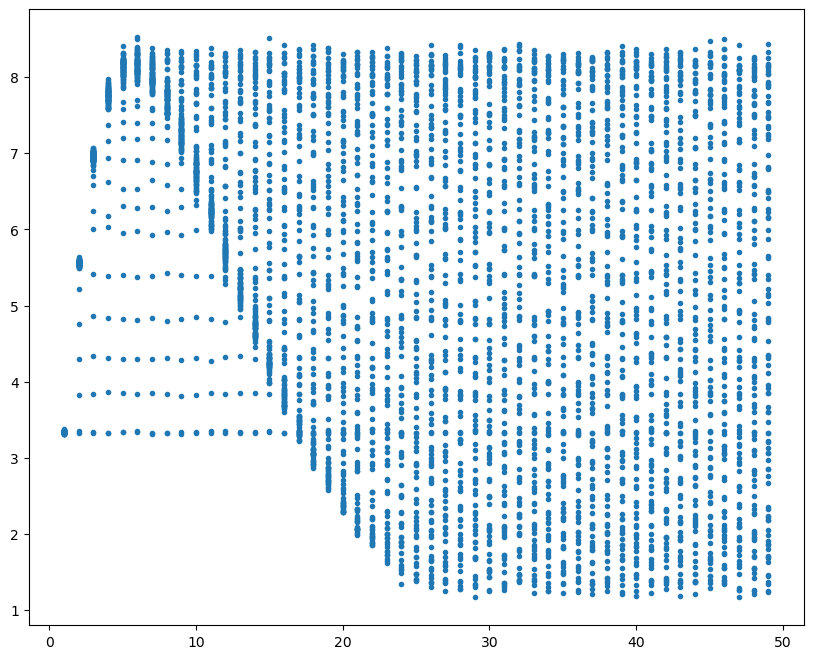

In [6]:
# plot the average roll vs. N_roll for the entire simulation
plt.figure(figsize=(10, 8))
plt.plot(df['N_roll'], df['Avg_roll'], '.')

In [7]:
# Testing the game_play2 function
debug1 = True
debug2 = True
avg = game_play3(6,20,100)
print(avg)

Turn 1
Player 1 score: 0
Player 2 score: 0
Player 2 turn
Roll: 4
Number of rolls: 1
Player 2 score: 4
Roll: 3
Number of rolls: 2
Player 2 score: 7
Roll: 1
Number of rolls: 3
Player 2 loses turn
Player 2 turn over

Turn 2
Player 1 score: 0
Player 2 score: 0
Player 1 turn
Roll: 5
Number of rolls: 1
Player 1 score: 5
Roll: 5
Number of rolls: 2
Player 1 score: 10
Roll: 2
Number of rolls: 3
Player 1 score: 12
Roll: 5
Number of rolls: 4
Player 1 score: 17
Roll: 2
Number of rolls: 5
Player 1 score: 19
Roll: 6
Number of rolls: 6
Player 1 score: 25
Player 1 turn over

Turn 3
Player 1 score: 25
Player 2 score: 0
Player 2 turn
Roll: 2
Number of rolls: 1
Player 2 score: 2
Roll: 1
Number of rolls: 2
Player 2 loses turn
Player 2 turn over

Turn 4
Player 1 score: 25
Player 2 score: 0
Player 1 turn
Roll: 4
Number of rolls: 1
Player 1 score: 29
Roll: 6
Number of rolls: 2
Player 1 score: 35
Roll: 2
Number of rolls: 3
Player 1 score: 37
Roll: 4
Number of rolls: 4
Player 1 score: 41
Roll: 6
Number of roll